# **Generating Handwritten Digits - GAN**

In [2]:
import torch
from torch import FloatTensor, LongTensor
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder

In [14]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((28, 28)),
        transforms.Normalize(mean = (0.5), std = (0.5))
    ]
)

In [15]:
data = datasets.MNIST(root = "data", download = True, transform = transform)

In [16]:
data_loader = DataLoader(data, batch_size = 100, shuffle = True)
data_loader.dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               Normalize(mean=0.5, std=0.5)
           )

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

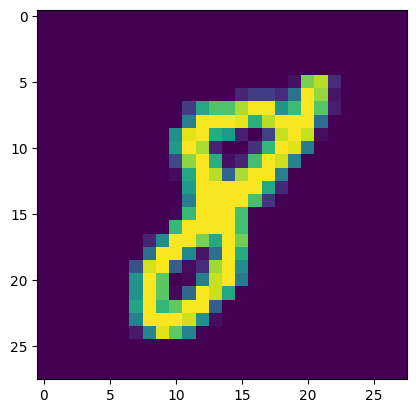

In [34]:
plt.imshow(data_loader.dataset[17][0][0])

In [35]:
import torch.nn as nn

In [37]:
class Discriminator(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc_layers = nn.Sequential(
        nn.Linear(28 * 28, 128),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Linear(128, 1),
        nn.Sigmoid()
    )

  def forward(self, x):
    return self.fc_layers(x)

In [38]:
latent_dim = 100

class Generator(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc_layers = nn.Sequential(
        nn.Linear(latent_dim, 128),
        nn.LeakyReLU(0.2, inplace = True),
        nn.Linear(128, 28 * 28),
        nn.Tanh()
    )

  def forward(self, x):
    return self.fc_layers(x)

In [39]:
discriminator = Discriminator().to(device)
generator = Generator().to(device)

In [41]:
loss_fn = nn.BCELoss()

optim_d = torch.optim.Adam(discriminator.parameters(), lr = 0.0002)
optim_g = torch.optim.Adam(generator.parameters(), lr = 0.0002)

In [43]:
import os
from torchvision.utils import save_image

In [46]:
epochs = 25

for epoch in range(epochs):

  for i, (imgs, _) in enumerate(data_loader):
    imgs = imgs.view(-1, 28 * 28).to(device)

    real_labels = torch.ones(100, 1).to(device) # 100 - batch_size
    fake_labels = torch.zeros(100, 1).to(device)

    # training the generator
    x = torch.randn(100, 100).to(device) # batch_size, latent_dim
    fake_imgs = generator(x)
    g_loss = loss_fn(discriminator(fake_imgs), real_labels)
    optim_g.zero_grad()
    g_loss.backward()
    optim_g.step()

    # training the discriminator
    d_loss_real = loss_fn(discriminator(imgs), real_labels)
    d_loss_fake = loss_fn(discriminator(fake_imgs.detach()), fake_labels)
    d_loss = (d_loss_real + d_loss_fake) / 2
    optim_d.zero_grad()
    d_loss.backward()
    optim_d.step()

    if i % 20 == 0:
            print(f"[Epoch {epoch}] [Batch {i}] [D loss: {d_loss.item()}] [G loss: {g_loss.item()}]")

    # Save generated images
    os.makedirs("images", exist_ok=True)
    save_image(fake_imgs.view(fake_imgs.size(0), 1, 28, 28), f"images/{epoch}.png", normalize=True)

print("Training finished.")

[Epoch 0] [Batch 0] [D loss: 0.3927289843559265] [G loss: 1.1885665655136108]
[Epoch 0] [Batch 20] [D loss: 0.5580869913101196] [G loss: 0.8520394563674927]
[Epoch 0] [Batch 40] [D loss: 0.6196258068084717] [G loss: 0.7760120034217834]
[Epoch 0] [Batch 60] [D loss: 0.5195685625076294] [G loss: 1.012087345123291]
[Epoch 0] [Batch 80] [D loss: 0.6367902755737305] [G loss: 0.741480827331543]
[Epoch 0] [Batch 100] [D loss: 0.6143494844436646] [G loss: 0.781632125377655]
[Epoch 0] [Batch 120] [D loss: 0.5213263034820557] [G loss: 0.9244856834411621]
[Epoch 0] [Batch 140] [D loss: 0.5984715223312378] [G loss: 0.8724424839019775]
[Epoch 0] [Batch 160] [D loss: 0.43228328227996826] [G loss: 1.1071218252182007]
[Epoch 0] [Batch 180] [D loss: 0.5328400135040283] [G loss: 0.8950631618499756]
[Epoch 0] [Batch 200] [D loss: 0.6106761693954468] [G loss: 0.9088558554649353]
[Epoch 0] [Batch 220] [D loss: 0.36192259192466736] [G loss: 1.3323404788970947]
[Epoch 0] [Batch 240] [D loss: 0.31424796581268

## **Generated Images**

In [48]:
from PIL import Image

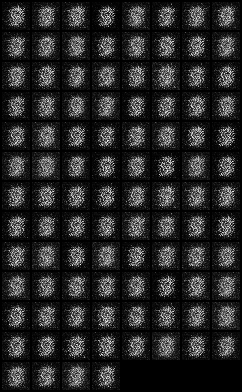

In [51]:
# Generated Images - Epoch 1
Image.open("images/0.png")

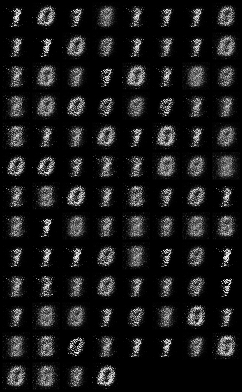

In [53]:
# Generated Images - Epoch 15
Image.open("images/14.png")

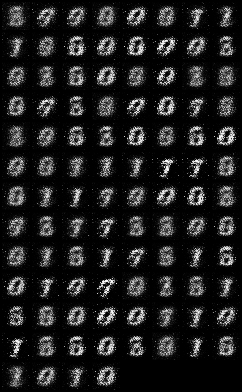

In [54]:
# Generated Images - Epoch 20
Image.open("images/19.png")

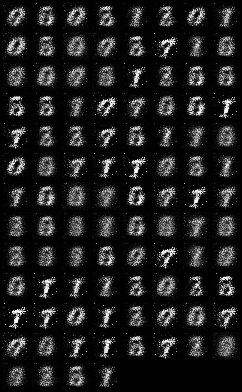

In [56]:
# Generated Images - Epoch 23
Image.open("images/22.png")